In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

In [7]:
df = pd.read_csv('../raw-data/segment1.csv')
#df.head(10)

In [9]:
# Extract the training and test data
data = df.values
X = data[:,[4,5,6]]
y = data[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
#X_train[:10]

In [11]:
# Scale the data to be between 0 and 1
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train[:10]

In [14]:
# Establish a SVR model with parameters
model = SVR(C=54, cache_size=500, epsilon=48, kernel='rbf', gamma='auto')
#model = SVR(C=100, cache_size=500, epsilon=4, kernel='rbf', gamma='auto')

In [15]:
# Train the model
model.fit(X_train, y_train)

SVR(C=54, cache_size=500, epsilon=48, gamma='auto')

In [16]:
#Final RMSE of the model
pred_y = model.predict(X_test)

mse =mean_squared_error(y_test, pred_y)
print("Mean Squared Error:",mse)
 
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 22788.782560947435
Root Mean Squared Error: 150.95953948309273


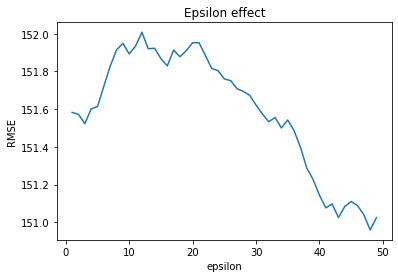

In [17]:
# Try to get the lowest RMSE by using different Epsilon value
epsilons = np.arange(1,50)
scores = []
for e in epsilons:
    model.set_params(epsilon=e)
    model.fit(X_train, y_train)
    scores.append(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("RMSE")
plt.show()

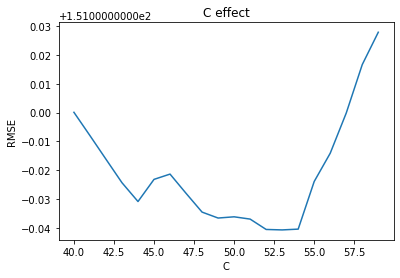

In [18]:
# Try to get the lowest RMSE by using different C value with Epsilon value above, then retrain the model again above
model.set_params(epsilon=48)
Cs = np.arange(40,60)
scores = []
for c in Cs:
    model.set_params(C=c)
    model.fit(X_train, y_train)
    scores.append(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
plt.plot(Cs, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("RMSE")
plt.show()